<a href="https://colab.research.google.com/github/GwenStacey/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
#Basic import statements, prefer keeping this all on their lonesome in notebooks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [5]:
#I made this list to take care of the missing column names, then used the head
#function to have a quick peak and make sure it looked right
column_names = ['Age','Year of Op 19--','Positive Nodes','Survival Status']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header = None, names = column_names)
df.head()

,Age,Year of Op 19--,Positive Nodes,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [7]:
#Confirming number of entries
df.shape

(306, 4)

In [9]:
#Confirming no missing values
df.isnull().sum()

Age                0
Year of Op 19--    0
Positive Nodes     0
Survival Status    0
dtype: int64

In [10]:
#This was a pretyy efficient way to handle this, as we knew exactly what the values
#were and what we wanted them to be, would probably need something a little more
#clever with less information
df['Survival Status'] = df['Survival Status'].replace(1,0)
df['Survival Status'] = df['Survival Status'].replace(2,1)
df.head()

,Age,Year of Op 19--,Positive Nodes,Survival Status
0,30,64,1,0
1,30,62,3,0
2,30,65,0,0
3,31,59,2,0
4,31,65,4,0


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

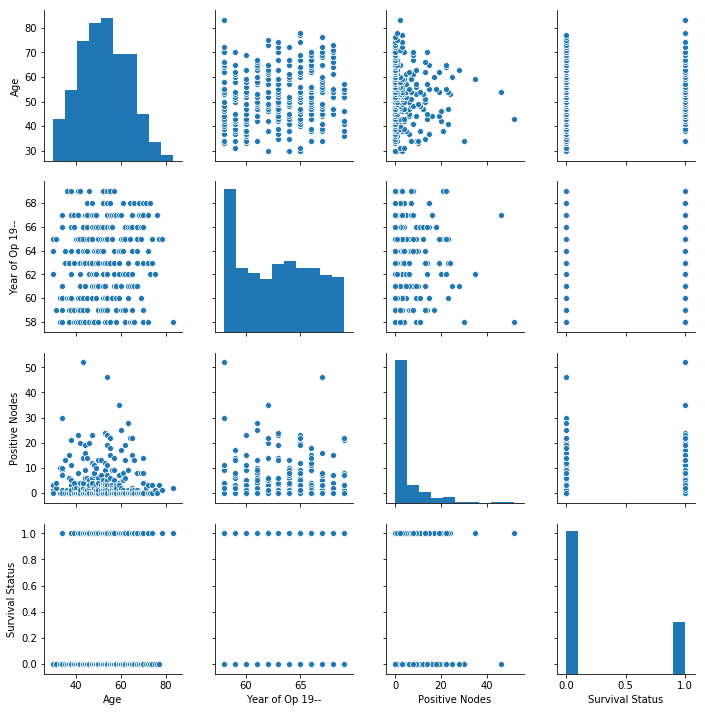

In [14]:
seaborn.pairplot(df)

In [19]:
tabs = [df['Age'], df['Positive Nodes']]
pd.crosstab(df['Survival Status'], tabs)

Age             30       31    33    34        ... 72    73 74    75 76 77 78  \
Positive Nodes  0  1  3  2  4  0  10 0  1  7   ... 0  3  0  0  3  1  0  3  1    
Survival Status                                ...                              
0                1  1  1  1  1  1  1  1  1  1  ...  2  1  2  1  0  1  1  1  0   
1                0  0  0  0  0  0  0  1  0  0  ...  1  0  0  0  1  0  0  0  1   

Age             83  
Positive Nodes  2   
Survival Status     
0                0  
1                1  

[2 rows x 185 columns]

In [24]:
df.describe()

,Age,Year of Op 19--,Positive Nodes,Survival Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,0.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


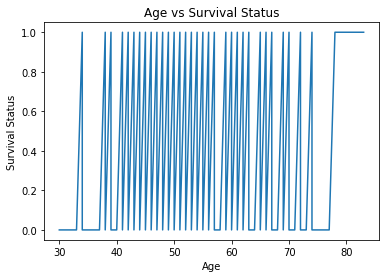

In [26]:
plt.plot(df['Age'],df['Survival Status'])
plt.xlabel('Age')
plt.ylabel('Survival Status')
plt.title('Age vs Survival Status')
plt.show()

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
From what I can see in this data, it looks like age is the biggest factor, and is positive.
I base that conclusion mostly on the pairplot, as the scatter of age vs survival status has more datapoints in surviving section.

- What is at least one feature that looks to have a negative relationship with survival?
It appears positive nodes has a negative relationship with survival. Again, this is primarily based on the pairplot, as the scatter of positive nodes vs survival status seemed to have more data points in the not surviving section.

- How are those two features related with each other, and what might that mean?
The relationship between age and positive nodes is pretty confusing. For the most part, it just seems to indicate that anyone of any age might have any number of positive nodes


Answer with text, but feel free to intersperse example code/results or refer to it from earlier.